CVFTesting will be deleted once testing is complete on the CVF class

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sax

from jax import config
config.update("jax_enable_x64", True)


from simphony.libraries import ideal
from simphony.utils import dict_to_matrix

from simphony.time_domain.pole_residue_model import CVFModelBaseband
from simphony.time_domain.utils import pole_residue_to_time_system

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


<class 'dict'>
Estimator: 4.958503429378404
Estimator: 165.97946400098772
Estimator: 10.138450446331097
Estimator: 6.9035971500029945
Estimator: 1.5588766574298571


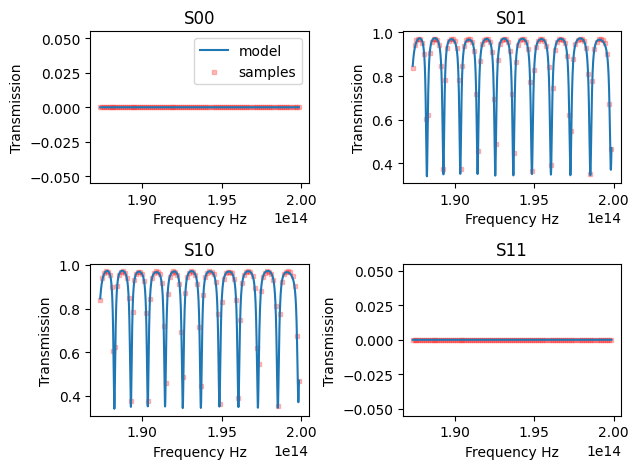

In [2]:
netlist = {
    "instances": {
        "wg": "waveguide",
        "hr": "half_ring",
    },
    "connections": {
        "hr,o2":"wg,o0",
        "hr,o3":"wg,o1",
    },
    "ports":{
        "o0":"hr,o0",
        "o1":"hr,o1",
    }
}
circuit, info = sax.circuit(
    netlist=netlist,
    models={
        "waveguide": ideal.waveguide,
        "half_ring": ideal.coupler,
    }
)

num_measurements = 100
model_order =50
wvl = np.linspace(1.5, 1.6, num_measurements)
s = circuit(wl=wvl, wg={"length": 77.0, "loss": 100})
print(type(s))
model = CVFModelBaseband(wvl,s,50)
model.plot_frequency_domain_model()

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]
Max value of y_out: 1.1437402444219575
Min value of y_out: 0.0


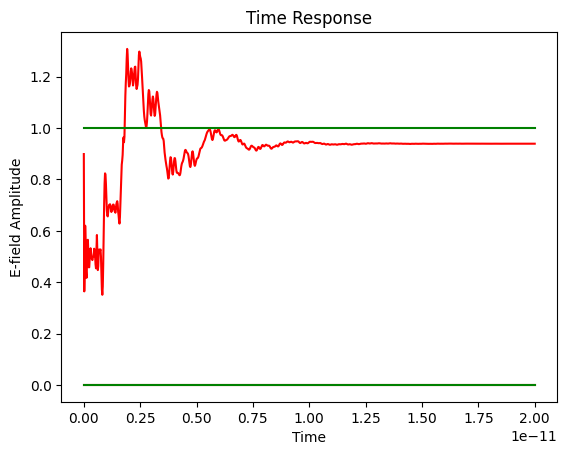

In [3]:
N = int(1000)
T = 2e-11
t = np.linspace(0, T, N)
sig = np.exp(1j*2*np.pi*t*0)
sig = sig.reshape(-1, 1)

impulse = np.hstack([np.real(sig), np.imag(sig)])
print(impulse)
tsys = pole_residue_to_time_system(model)
output = tsys.response(impulse)

t_out, y_out = output

plt.title("Time Response")
plt.xlabel("Time")
plt.ylabel("E-field Amplitude")

plt.plot(t_out, np.abs(y_out)**2,'red')
print(f"Max value of y_out: {np.max(np.abs(y_out))}")
print(f"Min value of y_out: {np.min(np.abs(y_out))}")

plt.plot(t, impulse,'green')



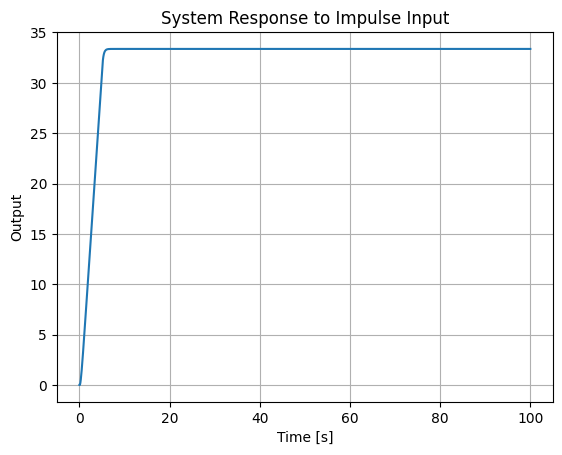

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import StateSpace, dlsim

# Define state-space matrices (for a simple system)
A = np.array([[0.9, 0.1], [0.2, 0.8]])  # State matrix
B = np.array([[1], [0]])                # Input matrix
C = np.array([[0, 1]])                  # Output matrix
D = np.array([[0]])                     # Feedthrough matrix

# Simulation parameters
T = 100  # Total simulation time in seconds
N = 1000  # Number of samples (time steps)
t = np.linspace(0, T, N)  # Time vector for simulation

# Define the impulse input signal (impulse at the first time step)
impulse = np.zeros(N)
impulse[0:50] = 1  # Impulse at the first sample

# Create the state-space system
sys = StateSpace(A, B, C, D, dt=T/N)

# Simulate the system's response using dlsim
t_out, y_out, x_out = dlsim(sys, impulse, t)

# Handle potential NaN values in y_out (just in case)
y_out = np.nan_to_num(y_out, nan=0)  # Replace NaNs with zeros

# Check if there are any NaN values in y_out after simulation
if np.any(np.isnan(y_out)):
    print("Warning: NaN values detected in y_out")

# Plot the output response
plt.plot(t_out, y_out)
plt.title("System Response to Impulse Input")
plt.xlabel("Time [s]")
plt.ylabel("Output")
plt.grid(True)
plt.show()